# Exercises week 38
### Show the rewrite
We write the cost function as 
$$C(\mathbf{X, \beta} = \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right]$$
then we write this out as
$$\mathbb{E}\left[ y^2 - 2y\tilde{y} + \tilde{y}^2 \right]
\\ = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2]
\\ = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2] $$
I will take on these three terms one by one:
$$\mathbb{E}[y^2] = \mathbb{E}[(f+\epsilon)^2]
\\ = \mathbb{E}[f^2 + 2f\epsilon + \epsilon^2]
\\ = \mathbb{E}[f^2] + \mathbb{E}[2f\epsilon] + \mathbb{E}[\epsilon^2]
$$ here we use that $\mathbb{E}[f] = f, \mathbb{E}[\epsilon] = 0, \mathbb{E}[\epsilon^2]=\sigma^2$ since $\epsilon$ is the only random/stochastic variable $\epsilon \sim \mathbb{N}(0, \sigma^2)$.
$$ = f^2 + 2f\mathbb{E}[\epsilon] + \sigma^2
\\ = f^2 + \sigma^2 $$


Then we tackle the next term:
$$ \mathbb{E}[y\tilde{y}] = \mathbb{E}[(f+\epsilon)\tilde{y}]
\\ = \mathbb{E}[f\tilde{y} + \epsilon\tilde{y}]
\\ = \mathbb{E}[f\tilde{y}] + \mathbb{E}[\epsilon\tilde{y}]
\\ = f\mathbb{E}[\tilde{y}] + \mathbb{E}[\epsilon] \mathbb{E}[\tilde{y}]
\\ = f\mathbb{E}[\tilde{y}]
$$
then the third and final term:
$$ \mathbb{E}[\tilde{y}^2] = var[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2 $$
where we have used the definition of variance $var(x) = \mathbb{E}[x^2] - (\mathbb{E}[x])^2$. We now put these three terms into our cost function expression:
$$ C(\mathbf{X, \beta} = \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right] = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2]
\\ = f^2 + \sigma^2 - 2f\mathbb{E}[\tilde{y}] + var[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2 
\\ = (f^2 - 2f\mathbb{E}[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2) + \sigma^2 + var[\tilde{y}]
\\ = (f - \mathbb{E}[\tilde{y}])^2 + var[\tilde{y}] + \sigma^2 
\\ \simeq (y - \mathbb{E}[\tilde{y}])^2 + var[\tilde{y}] + \sigma^2 
\\ = (Bias[\tilde{y}])^2 +  var[\tilde{y}] + \sigma^2 
$$
where we can write out the variance as 
$$ var[\tilde{y}] = \frac{1}{N} \sum_{i=0}^{N-1} (\tilde{y}_i - \mathbb{E}[\tilde{y}])^2 $$
such that we have now shown that 
$$ \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right] = (Bias[\tilde{y}])^2 +  var[\tilde{y}] + \sigma^2 $$

The bias term means the model's systematic bias (or the model's mean value's error) from the ideal. For example this could mean that all our model's data points/the model's mean value have a shift from the ideal of a some constant $C$ like $|y - \tilde{y}| = C$. A big bias means a bigger drift and error from the ideal, and therefore a low bias is what we want.

The variance term is our model's variance from the mean value. A high variance means a bigger spread of the model data points around the mean/expectation value, and a low variance means a smaller spread which is what we want.

### 1D Bias-variance analysis with OLS
Below I plot test MSE, bias, and variance for different polynomial degrees with OLS, without resampling:

Text(0, 0.5, 'Value')

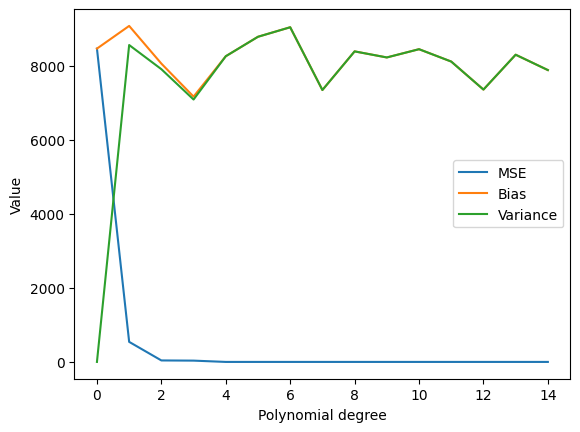

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# PARAMETERS
n = 1000  # no. data points
maxdegree = 15


def bias(ideal, actual):
    return np.mean((ideal - np.mean(actual))**2)

def variance(array):
    return np.var(array)


# Create data set
np.random.seed(2023)
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = x**4 - 16*x**2 + 50*x# +  np.random.normal(0, 0.1, x.shape)

# Create arrays
degrees = np.arange(0, maxdegree, 1) # loop from polynomial degree 1 to maxdegree
mse_arr = np.zeros_like(degrees)
bias_arr = np.zeros_like(degrees)
variance_arr = np.zeros_like(degrees)

linreg = LinearRegression(fit_intercept=False)  # include intercept

# Create design matrix first
X = np.zeros((n, maxdegree))
for degree in degrees:
    X[:, degree] = x[:, 0]**degree
    
# Then loop over the degrees again to do the mean error calculations
for degree in degrees:
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X[:, :degree+1], y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_predict = linreg.predict(X_test)
    mse_arr[degree] = mean_squared_error(y_test, y_predict)
    bias_arr[degree] = bias(y_test, y_predict)
    variance_arr[degree] = variance(y_predict)

# Plotting
plt.plot(degrees, mse_arr, label="MSE")
plt.plot(degrees, bias_arr, label="Bias")
plt.plot(degrees, variance_arr, label="Variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Value")

### Bias-variance-tradeoff of OLS using bootstrap resampling
Below I first plot the test mse, bias, and variance for OLS using bootstrap. Firstly I plot as a function of polynomial degree (model complexity), then as a function of number of data points.